
Demo 1: Two-dimensional Gaussian
===

We demonstrate our method to compute rectangular credible regions on a two-dimensional Gaussian.

First, we load the precomputed data. The density of the Gaussian has the form

$
p(x) \propto \exp( - \frac{1}{2} ||Ax - b||_2^2 ),
$

so we only need to know the $2 \times 2$-matrix $A$ and the 2-dimensional vector $b$.


In [98]:
from examples import two_dimensional_example

num_samples = 3000
mode, _, a, b, samples = two_dimensional_example(num_samples)

The function `two_dimensional_example` also generated samples from the density. Let us take a look at those.

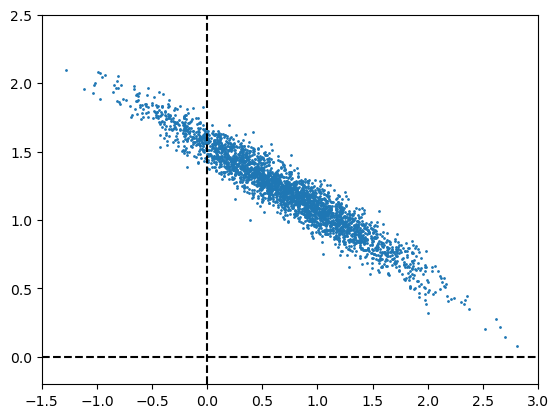

In [99]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-1.5, 3)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(samples[:, 0], samples[:, 1], s=1)

Now, let us compute a rectangular 95%-credible region with **DRCR**. It is implemented in the function `rectangular_cr/drcr.py`.
The function returns two vectors, `lb` and `ub`, corresponding to the lower and upper bounds of a box that contains 95% of the provided samples. It also



In [100]:
import numpy as np
from rectangular_cr import drcr

theta = 0.95

def g(x):
    return np.sum(np.square(a @ x - b))

lb, ub, theta_est = drcr(theta, samples, g, mode)

print(f"Lower bound: {lb}")
print(f"Upper bound: {ub}")

Bisection terminated after 12 steps.
Lower bound: [-0.47921182  0.60593215]
Upper bound: [1.91430544 1.80222555]


The function `drcr` also returns $\theta_\text{est}$, the achieved credibility level. This is simply the ratio of the number of samples inside the computed credible
intervals to the overall number of samples.


In [101]:
print(f"Desired credibility level: theta = {theta:2g}")
print(f"Achieved credibility level: theta_est = {theta_est:2g}")

Desired credibility level: theta = 0.95
Achieved credibility level: theta_est = 0.951


We see that we achieve the desired credibility level almost exactly. Finally, let us visualize the computed credible interval.



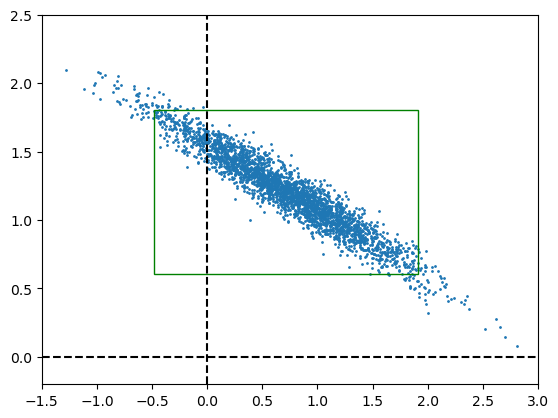

In [102]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-1.5, 3)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(samples[:, 0], samples[:, 1], s=1)
ci = Rectangle(lb, ub[0] - lb[0], ub[1] - lb[1], facecolor="none", edgecolor="g")
ax.add_patch(ci)

**Comparison with Besag method**:

Let us compare the results of **DRCR** with the Besag method.



In [103]:
from rectangular_cr import besag_method

lb_besag, ub_besag, theta_est_besag = besag_method(theta, samples)
print(f"Lower bound: {lb_besag}")
print(f"Upper bound: {ub_besag}")

Lower bound: [-0.46452328  0.6063448 ]
Upper bound: [1.89356454 1.82013115]


First, what is the achieved credibility level for the Besag method?



In [104]:
print(f"Desired credibility level: theta = {theta:2g}")
print(f"Achieved credibility level: theta_est = {theta_est_besag:2g}")

Desired credibility level: theta = 0.95
Achieved credibility level: theta_est = 0.951


So, the Besag method also performs quite well. Let us finish the example with a visual comparison:


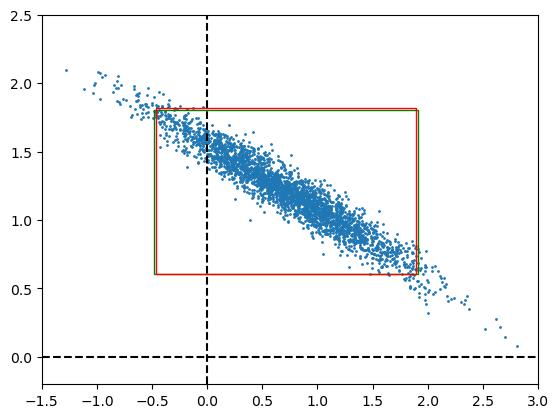

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlim(-1.5, 3)
ax.set_ylim(-0.2, 2.5)
ax.axhline(0, color="k", linestyle="--")
ax.axvline(0, color="k", linestyle="--")
ax.scatter(samples[:, 0], samples[:, 1], s=1)
ci = Rectangle(lb, ub[0] - lb[0], ub[1] - lb[1], facecolor="none", edgecolor="g")
ax.add_patch(ci)
ci_besag = Rectangle(lb_besag, ub_besag[0] - lb_besag[0], ub_besag[1] - lb_besag[1], facecolor="none", edgecolor="r")
ax.add_patch(ci_besag)

So, the estimated credible intervals are almost identical.



Demo 2: High-dimensional Gaussian
===

Next, let us look at a high-dimensional Gaussian model.




In [106]:
from examples import high_dimensional_example

dim = 50
num_samples = 3000
mode, _, a, b, samples = high_dimensional_example(dim, num_samples)

Let us compute simultaneous credible intervals, both with **DSCI** and the Besag method.



In [107]:
def g(x):
    return np.sum(np.square(a @ x - b))

lb, ub, theta_est = drcr(theta, samples, g, mode)
# For comparison, compute with Besag-method.
lb_besag, ub_besag, theta_est_besag = besag_method(theta, samples)

Bisection terminated after 13 steps.


Let us compare the achieved crediblity levels.



In [108]:

print(f"Desired credibility level: theta = {theta:2g}")
print(f"DRCR method: theta_est = {theta_est:2g}.")
print(f"Besag method: theta_est = {theta_est_besag:2g}.")

Desired credibility level: theta = 0.95
DRCR method: theta_est = 0.950333.
Besag method: theta_est = 0.969.


So, the Besag method is a bit too conservative, why the novel method still achieves the desired credibility level. Let us compare the volumes
of the credible regions.



In [109]:
vol = np.prod(ub - lb)
vol_besag = np.prod(ub_besag - lb_besag)

print(f"Volume of DSCR: {vol:2g}.")
print(f"Volume of Besag credible region: {vol_besag:2g}.")

Volume of DSCR: 5.51846e+17.
Volume of Besag credible region: 1.35358e+18.


We see that the Besag method leads to credible intervals that are 3-times larger than for DSCI.

Finally, by increasing the dimension even further, we arrive at a point where the Besag method breaks down:



In [110]:
dim = 150
mode, _, a, b, samples = high_dimensional_example(dim, num_samples)

def g(x):
    return np.sum(np.square(a @ x - b))

lb, ub, theta_est_drcr = drcr(theta, samples, g, mode)
# For comparison, compute with Besag-method.
lb_besag, ub_besag, theta_est_besag = besag_method(theta, samples)

print(f"Desired credibility level: theta = {theta:2g}")
print(f"DRCR method: theta_est = {theta_est_drcr:2g}.")
print(f"Besag method: theta_est = {theta_est_besag:2g}.")

Bisection terminated after 11 steps.
Desired credibility level: theta = 0.95
DRCR method: theta_est = 0.95.
Besag method: theta_est =  1.


So, the Besag method returns a rectangular credible region that contain all of the samples. This is not of much use, since we could have computed
such a region very easily by min-maxing. In contrast, DRCR is able to achieve the desired credibility level almost exactly.

Demo 3: Non-Gaussian example
---

*Coming soon...*